             user_id   merchant_id         label       item_id        cat_id  \
count   23956.000000  23956.000000  23956.000000  2.395600e+04  23956.000000   
mean   116800.737811   2897.869052      0.171815  5.578500e+05    859.816330   
std    120334.335844   1548.712140      0.377227  3.193599e+05    462.259444   
min     18306.000000     66.000000      0.000000  2.000000e+00      2.000000   
25%     18306.000000   1425.000000      0.000000  2.841750e+05    420.000000   
50%     38787.000000   2952.000000      0.000000  5.610865e+05    786.000000   
75%    226434.000000   4499.000000      0.000000  8.278060e+05   1271.000000   
max    423042.000000   4992.000000      1.000000  1.112891e+06   1671.000000   

          seller_id      brand_id    time_stamp   action_type     age_range  \
count  23956.000000  23956.000000  23956.000000  23956.000000  23956.000000   
mean    2359.881408   4173.031140    912.040199      0.317081      3.345341   
std     1527.713077   2346.750186    190.9

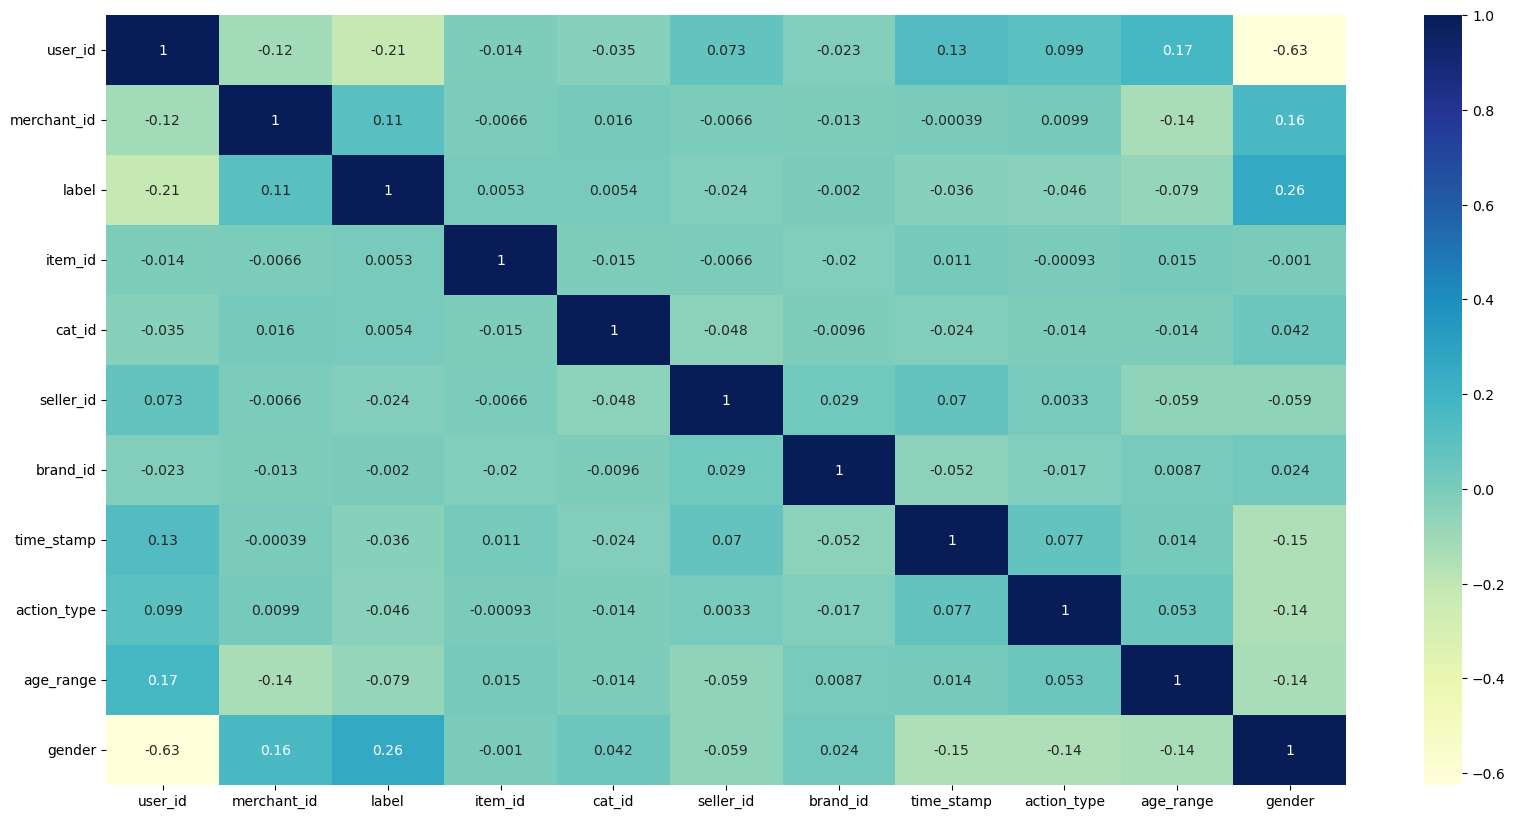

In [250]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data
data = pd.read_csv('feature_Engineered_train_Changed.csv')
# data=data.drop('repeat_buyer_count_merchant',axis=1)
# Summary statistics
print(data.describe())

# Feature ranking using correlation
corr = data.corr()
corr_label = abs(corr['label'])
important_features = corr_label[corr_label > 0.1].index.tolist()
print('Important features:', important_features)



fig, ax = plt.subplots(figsize=(20,10))
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,)

# displaying heatmap
plt.show()
# Feature ranking using SHAP (example)
# shap_values = shap.TreeExplainer(model).shap_values(data)
# shap.summary_plot(shap_values, data)



In [251]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap

# Load data
data = pd.read_csv('feature_Engineered_train_Changed.csv')
# data=data.drop('repeat_buyer_count_merchant',axis=1)
# data=data.drop('user_id',axis=1)

In [252]:
# data['time_stamp'] = (data['time_stamp']).astype(int)

# # duration_in_seconds_int = int(duration_in_seconds)
# data=data.drop(['repeat_buyer_count_merchant','merchant_id','avg_user_age_merchant','age_avg_per_merchant'],axis=1)
# # data['purchase_average_time'] = pd.to_datetime(data['purchase_average_time'])
# # convert datetime objects to integers
# data['time_stamp'] = data['time_stamp'].apply(lambda x: int(x.timestamp()))
# # data['purchase_average_time'] = data['purchase_average_time'].apply(lambda x: int(x.timestamp()))
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(23956, 11)
(23956, 11)


In [253]:
from sklearn.model_selection import train_test_split

X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
# Train XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


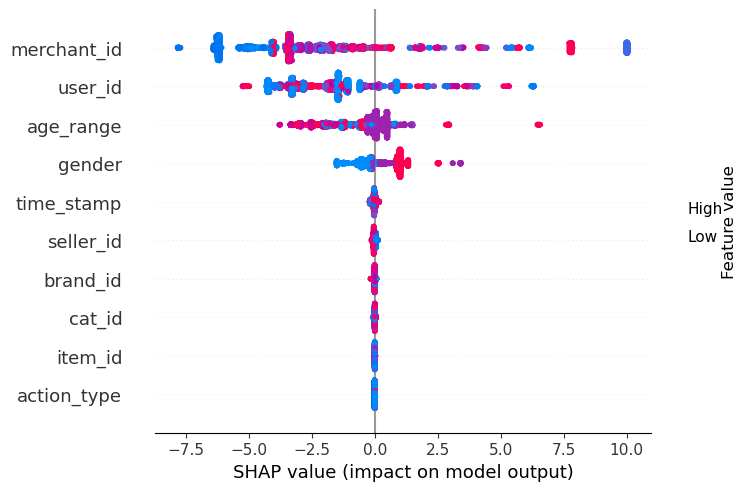

In [255]:
# Create an explainer object
explainer = shap.Explainer(clf)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize summary plot
shap.summary_plot(shap_values, X_test)




In [256]:
# One-hot encode the "gender" feature
data = pd.get_dummies(data, columns=["gender"], prefix=["isgender"])
# data=data.drop('isgender_2',axis=1)
# Print the new columns
print(data.columns)

Index(['user_id', 'merchant_id', 'label', 'item_id', 'cat_id', 'seller_id',
       'brand_id', 'time_stamp', 'action_type', 'age_range', 'isgender_0',
       'isgender_1', 'isgender_2'],
      dtype='object')


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


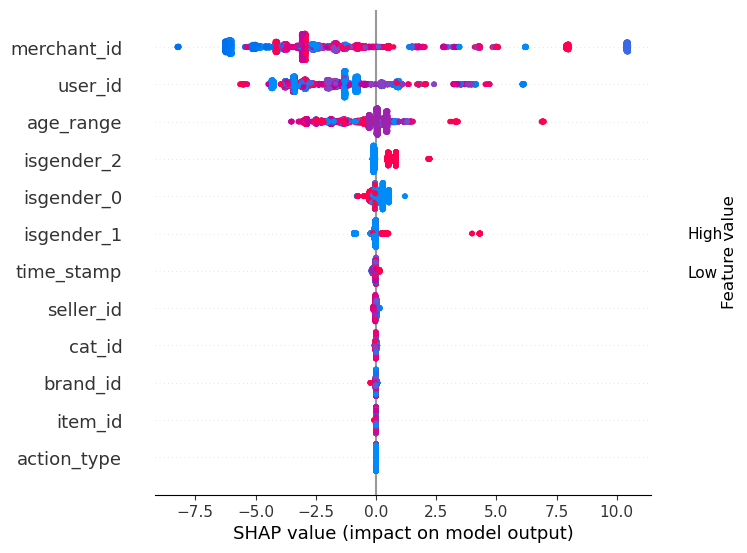

In [257]:
#can gender be feature engineered better?
from sklearn.model_selection import train_test_split
X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Train XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


# Create an explainer object
explainer = shap.Explainer(clf)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize summary plot
shap.summary_plot(shap_values, X_test)




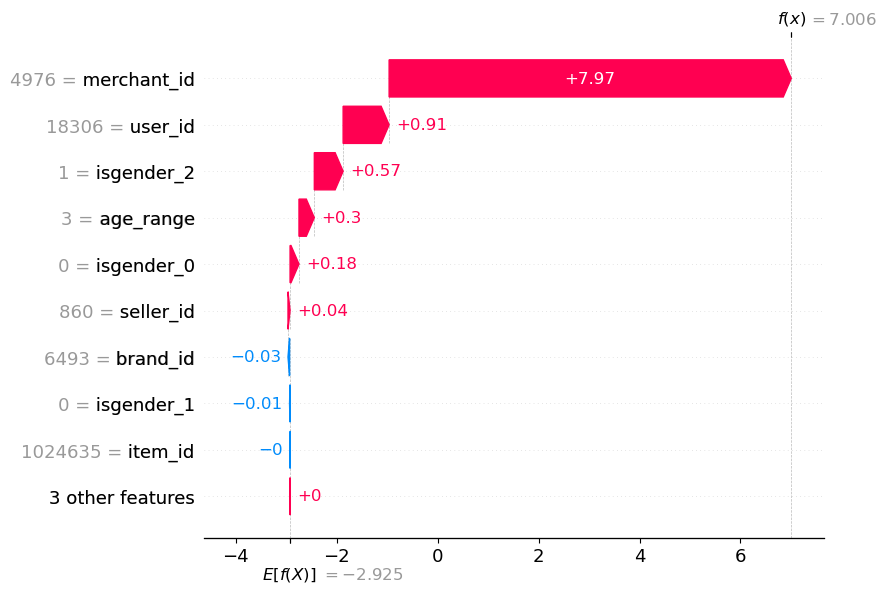

In [258]:
shap.plots.waterfall(shap_values[0])


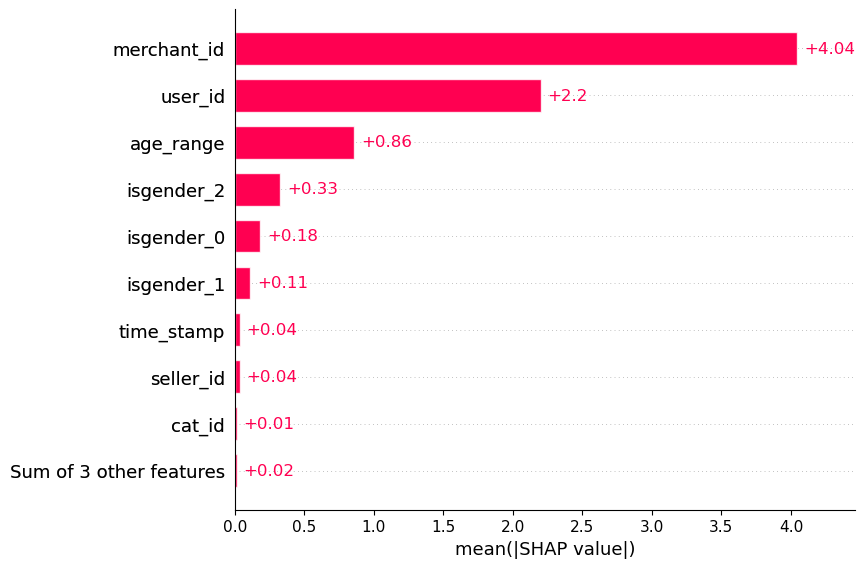

In [259]:
shap.plots.bar(shap_values)

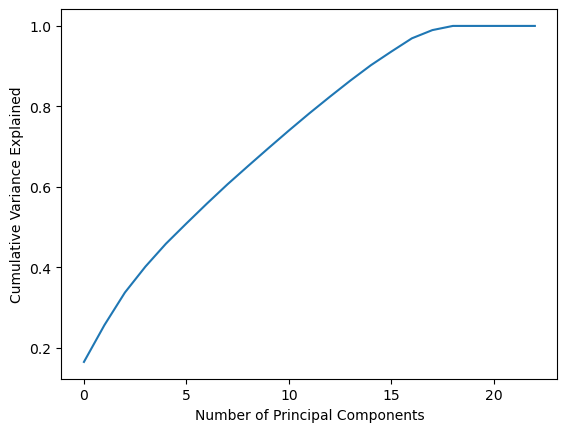

Optimal number of principal components: 17
Accuracy: 0.866652754590985


In [260]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('feature_Engineered_train.csv')
df=df.dropna()
# Split the data into features and target label
X = df.drop('label', axis=1)
y = df['label']

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['action_type', 'age_range', 'gender'])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Plot the cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Determine the optimal number of principal components to use
n_components = np.argmax(cumulative_variance_explained >= 0.95) + 1
print(f"Optimal number of principal components: {n_components}")

# Use the optimal number of principal components to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a machine learning model on the transformed data
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [261]:
X_pca.shape

(23956, 17)

In [262]:
# Get the column names for the transformed dataset
columns = [f"PC{i}" for i in range(1, pca.n_components_ + 1)]
df_pca = pd.DataFrame(X_pca, columns=columns)

# Add the target label to the transformed dataset
df_pca['label'] = y
df_pca.head()
# Save the transformed dataset to a new file
df_pca.to_csv('data_post_pca.csv', index=True)

In [263]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8267946577629383


In [264]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Perform PCA
# pca = PCA(n_components=10)  # Choose the number of principal components to keep
# X_pca = pca.fit_transform(X)

from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[-1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")
y_prob = model.predict(X_test)
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

Epoch 1/10
480/480 [==============================] - 0s 657us/step - loss: 0.4037 - accuracy: 0.8248 - val_loss: 0.3546 - val_accuracy: 0.8382
Epoch 2/10
480/480 [==============================] - 0s 516us/step - loss: 0.3429 - accuracy: 0.8372 - val_loss: 0.3141 - val_accuracy: 0.8492
Epoch 3/10
480/480 [==============================] - 0s 507us/step - loss: 0.2850 - accuracy: 0.8715 - val_loss: 0.2498 - val_accuracy: 0.8977
Epoch 4/10
480/480 [==============================] - 0s 504us/step - loss: 0.2236 - accuracy: 0.9102 - val_loss: 0.2017 - val_accuracy: 0.9144
Epoch 5/10
480/480 [==============================] - 0s 537us/step - loss: 0.1850 - accuracy: 0.9179 - val_loss: 0.1819 - val_accuracy: 0.9144
Epoch 6/10
480/480 [==============================] - 0s 532us/step - loss: 0.1635 - accuracy: 0.9208 - val_loss: 0.1623 - val_accuracy: 0.9189
Epoch 7/10
480/480 [==============================] - 0s 548us/step - loss: 0.1512 - accuracy: 0.9226 - val_loss: 0.1514 - val_accuracy: